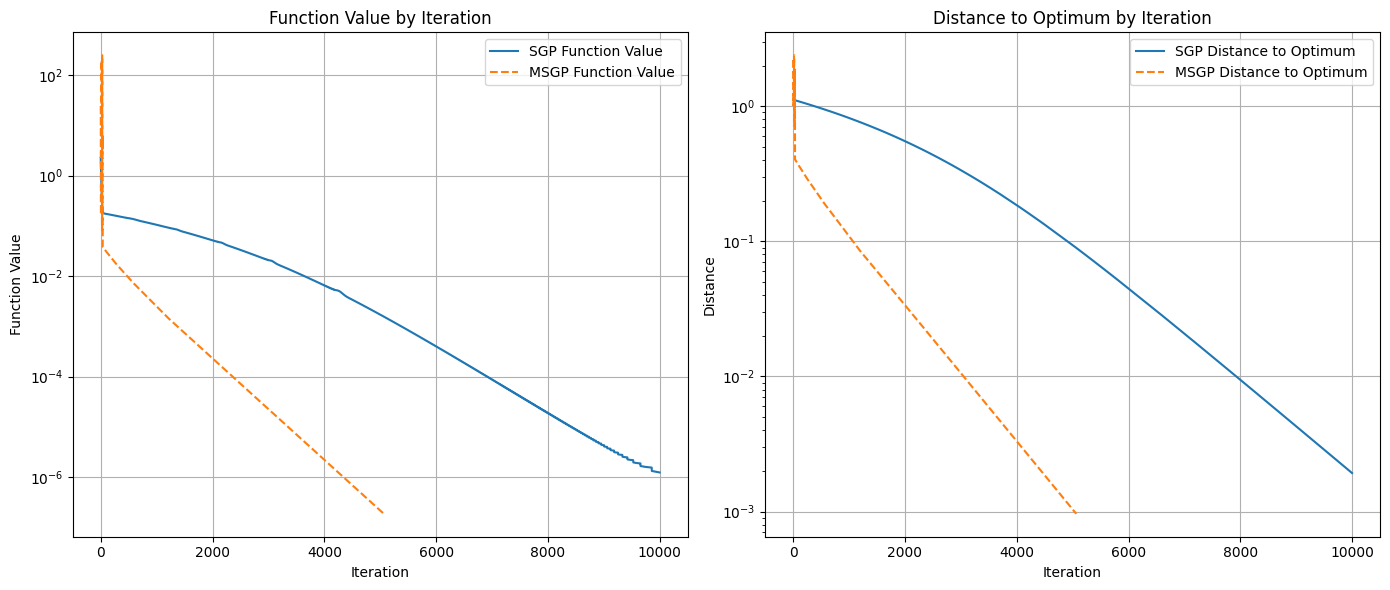

In [5]:
import numpy as np
import matplotlib.pyplot as plt


def spectral_gradient_projection_method(F, grad_F, x0, projection, max_iter=10000, tol=1e-5):
    xk = x0
    gk = grad_F(xk)
    dk = -gk  # Initial search direction
    function_values = []
    distances = []

    for k in range(max_iter):
        if k > 0:
            sk = xk - x_prev
            yk = gk - gk_prev
            beta_k = np.dot(sk, yk) / (np.dot(yk, yk) + 1e-10)
            dk = -gk + beta_k * dk_prev

        lambda_k = 1
        while F(xk + lambda_k * dk) > F(xk) + 1e-4 * lambda_k * np.dot(gk, dk):
            lambda_k *= 0.9

        x_next = xk + lambda_k * dk
        x_next = projection(x_next)

        function_values.append(F(x_next))
        distances.append(np.linalg.norm(x_next - np.array([1, 1])))

        if np.linalg.norm(x_next - xk) < tol:
            break

        x_prev = xk
        xk = x_next
        gk_prev = gk
        gk = grad_F(xk)
        dk_prev = dk

    return xk, function_values, distances


def projection(x):
    return x


def F(x):
    return (1 - x[0]) ** 2 + 100 * (x[1] - x[0] ** 2) ** 2


def grad_F(x):
    return np.array([-2 * (1 - x[0]) - 400 * x[0] * (x[1] - x[0] ** 2), 200 * (x[1] - x[0] ** 2)])


def MSGP(x0, r=0.01, rho=0.9, sigma=0.0001, epsilon=1e-6, beta=0.5, delta=0.1, max_iter=1000000):
    xk = x0
    n = len(xk)
    function_values = []
    distances = []

    for k in range(max_iter):
        gk = grad_F(xk)
        function_values.append(F(xk))
        distances.append(np.linalg.norm(xk - np.array([1, 1])))

        if np.linalg.norm(gk) < epsilon:
            print(f"Convergence achieved in {k} iterations")
            return xk, function_values, distances

        if k == 0:
            dk = -gk
        else:
            lambda_k = np.zeros(n)
            for i in range(n):
                if sk[i] != 0:
                    lambda_k[i] = max(yk[i] / sk[i], epsilon) if yk[i] / sk[i] > 0 else delta

            Dk = np.diag(1 / lambda_k)
            dk = -np.dot(Dk, gk)

        alpha_k = beta
        while True:
            new_xk = xk + alpha_k * dk
            if -np.dot(grad_F(new_xk), dk) >= sigma * alpha_k * np.linalg.norm(grad_F(new_xk)) * np.linalg.norm(dk):
                break
            alpha_k *= rho

        xk = xk + alpha_k * dk

        if np.linalg.norm(xk - (xk - alpha_k * dk)) < epsilon:
            return xk, function_values, distances

        sk = xk - (xk - alpha_k * dk)
        yk = grad_F(xk) - grad_F(xk - alpha_k * dk)

    print("Maximum iterations reached without convergence.")
    return xk, function_values, distances


x0 = np.array([-1.2, 1.0])
solution_sgp, function_values_sgp, distances_sgp = spectral_gradient_projection_method(F, grad_F, x0, projection)
result_msgp, function_values_msgp, distances_msgp = MSGP(x0, x0)  # Assuming X is the same as x0

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(function_values_sgp, label='SGP Function Value')
plt.plot(function_values_msgp, label='MSGP Function Value', linestyle='--')
plt.title('Function Value by Iteration')
plt.xlabel('Iteration')
plt.ylabel('Function Value')
plt.yscale('log')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(distances_sgp, label='SGP Distance to Optimum')
plt.plot(distances_msgp, label='MSGP Distance to Optimum', linestyle='--')
plt.title('Distance to Optimum by Iteration')
plt.xlabel('Iteration')
plt.ylabel('Distance')
plt.yscale('log')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
